In [831]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# import data
from google.colab import files

In [832]:
#Import Data
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset (2).csv


#1. Data Preparation
1.1 Load Data

In [982]:
data = pd.read_csv('credit_risk_dataset.csv')

# Table check
data.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [983]:
# Check the data shape
data.shape

(32581, 12)

In [984]:
# Drop Data
data = data.drop(columns=['person_emp_length', 'loan_intent', 'loan_amnt'])

In [985]:
# Define response variable
response_variable = 'loan_status'

# Check the proportion of response variable
data[response_variable].value_counts(normalize = True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

1.2 Sample Splitting

In [986]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns = [response_variable],
              axis = 1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (32581,)
X shape : (32581, 8)


In [987]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (22806, 8)
y train shape : (22806,)
X test shape  : (9775, 8)
y test shape  : (9775,)


In [988]:
y_train.value_counts(normalize = True)

0    0.781856
1    0.218144
Name: loan_status, dtype: float64

In [989]:
y_test.value_counts(normalize = True)

0    0.78179
1    0.21821
Name: loan_status, dtype: float64

#2. Data Exploration
2.1 Exploratory Data Analysis (EDA)

In [990]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train),
                       axis = 1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head()

Train data shape: (22806, 9)


,person_age,person_income,person_home_ownership,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
11491,26,62000,RENT,B,11.26,0.16,N,2,0
3890,23,39000,MORTGAGE,C,12.98,0.13,N,4,0
17344,24,35000,RENT,A,6.54,0.34,N,2,1
13023,24,86000,RENT,B,10.65,0.14,N,3,0
29565,42,38400,RENT,B,NaN,0.34,N,11,1


Check for Missing Values

In [991]:
# Check for missing values
data_train.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
loan_grade                       0
loan_int_rate                 2200
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [992]:
# Check for data type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22806 entries, 11491 to 10456
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  22806 non-null  int64  
 1   person_income               22806 non-null  int64  
 2   person_home_ownership       22806 non-null  object 
 3   loan_grade                  22806 non-null  object 
 4   loan_int_rate               20606 non-null  float64
 5   loan_percent_income         22806 non-null  float64
 6   cb_person_default_on_file   22806 non-null  object 
 7   cb_person_cred_hist_length  22806 non-null  int64  
 8   loan_status                 22806 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.7+ MB


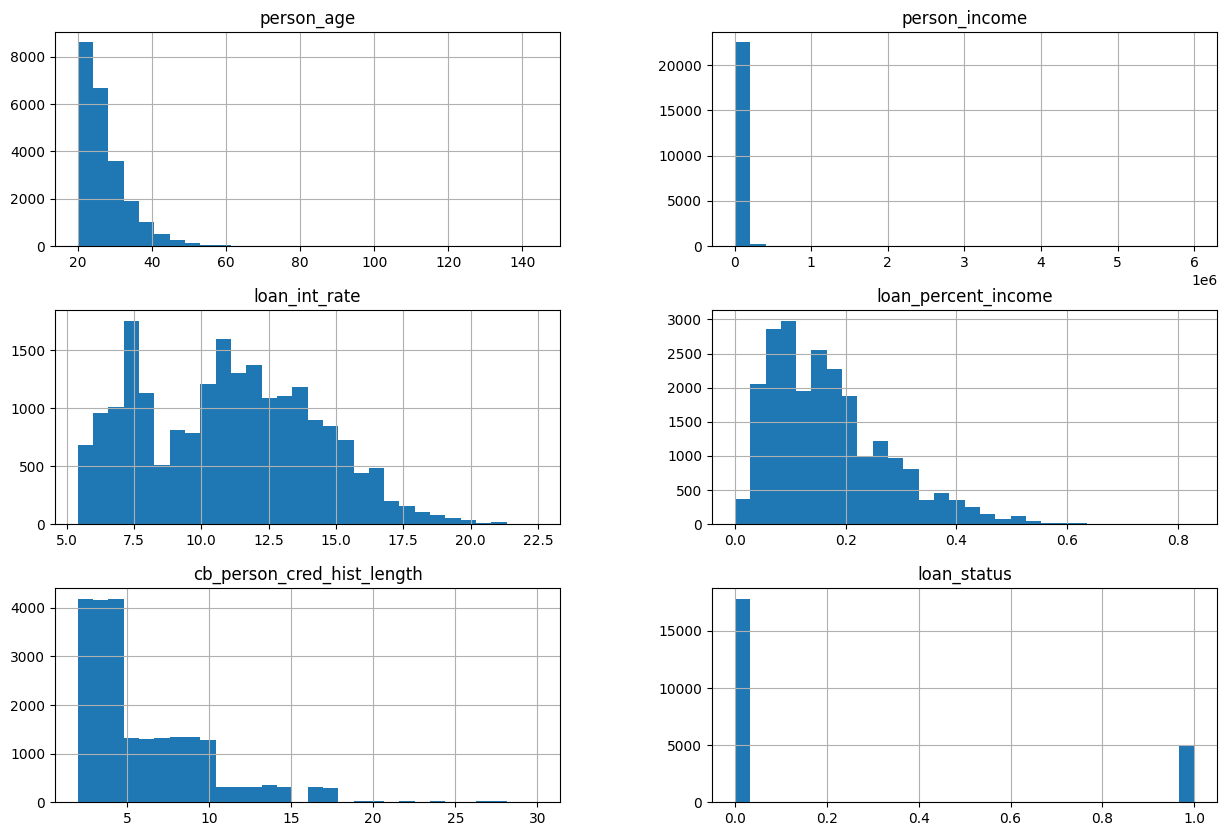

In [993]:
# Distribution in each numerical variables
data_train.hist(bins=30, figsize=(15, 10))
plt.show()

2.3 person_age

In [994]:
# Credit class by Age
data_train["person_age"].groupby(data_train["loan_status"]).describe().round(0)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,17831.0,28.0,6.0,20.0,23.0,26.0,30.0,144.0
1,4975.0,28.0,6.0,20.0,23.0,26.0,30.0,70.0


<Axes: xlabel='loan_status', ylabel='person_age'>

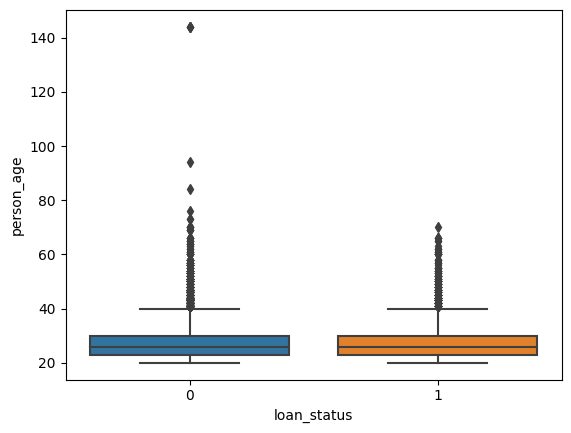

In [995]:
# Boxplot of person_age by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'person_age')

2.4 person_income

In [996]:
# Credit class by person_income
data_train["person_income"].groupby(data_train["loan_status"]).describe().round(0)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,17831.0,70925.0,68751.0,7000.0,42000.0,60000.0,84996.0,6000000.0
1,4975.0,49298.0,37370.0,4000.0,30000.0,41277.0,59486.0,648000.0


<Axes: xlabel='loan_status', ylabel='person_income'>

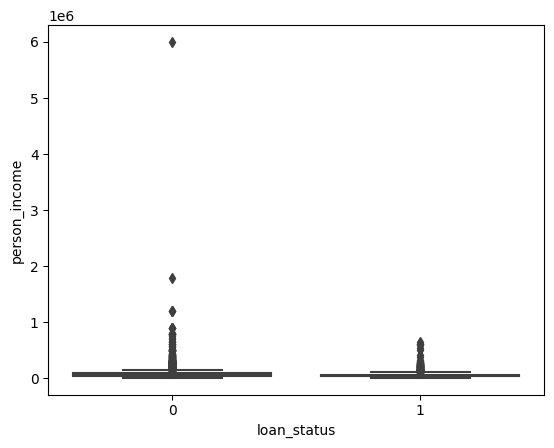

In [997]:
# Boxplot of person_income by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'person_income')

2.5 loan_int_rate

In [998]:
# Credit class by loan_int_rate
data_train["loan_int_rate"].groupby(data_train["loan_status"]).describe().round(0)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,16113.0,10.0,3.0,5.0,8.0,11.0,13.0,22.0
1,4493.0,13.0,3.0,5.0,11.0,13.0,16.0,22.0


<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

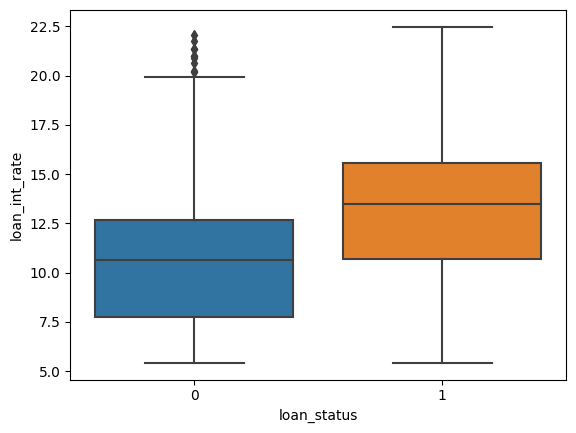

In [999]:
# Boxplot of loan_int_rate by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'loan_int_rate')

2.6 loan_percent_income

In [1000]:
# Credit class by loan_percent_income
data_train["loan_percent_income"].groupby(data_train["loan_status"]).describe().round(0)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,17831.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4975.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

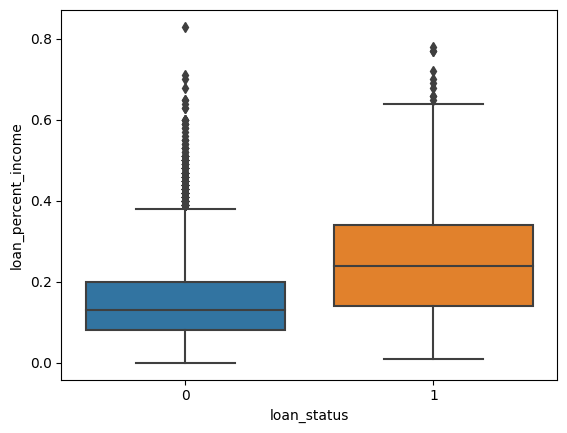

In [1001]:
# Boxplot of loan_percent_income by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'loan_percent_income')

2.7 cb_person_cred_hist_length

In [1002]:
# Credit class by cb_person_cred_hist_length
data_train["cb_person_cred_hist_length"].groupby(data_train["loan_status"]).describe().round(0)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,17831.0,6.0,4.0,2.0,3.0,4.0,8.0,30.0
1,4975.0,6.0,4.0,2.0,3.0,4.0,8.0,30.0


<Axes: xlabel='loan_status', ylabel='cb_person_cred_hist_length'>

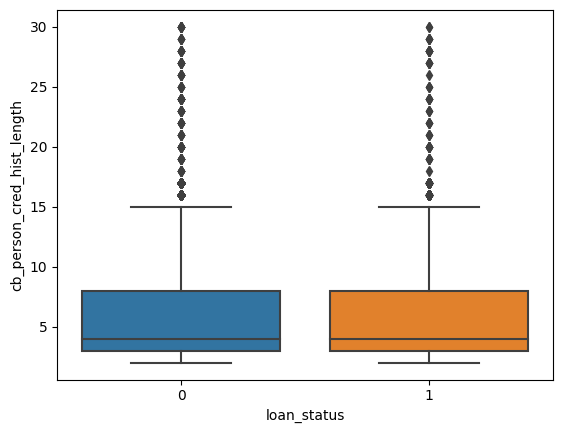

In [1003]:
# Boxplot of cb_person_cred_hist_length by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'cb_person_cred_hist_length')

2.8 Check Correlation

In [1004]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22806 entries, 11491 to 10456
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  22806 non-null  int64  
 1   person_income               22806 non-null  int64  
 2   person_home_ownership       22806 non-null  object 
 3   loan_grade                  22806 non-null  object 
 4   loan_int_rate               20606 non-null  float64
 5   loan_percent_income         22806 non-null  float64
 6   cb_person_default_on_file   22806 non-null  object 
 7   cb_person_cred_hist_length  22806 non-null  int64  
 8   loan_status                 22806 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.7+ MB


In [1005]:
# Define data with numerical predictors
num_columns = ['person_age',
               'person_income',
               'loan_int_rate',
               'loan_percent_income',
               'cb_person_cred_hist_length']

In [1006]:
# Define data with categorical predictors
cat_columns = ['person_home_ownership',
               'loan_grade',
               'cb_person_default_on_file']

Check Multicollinearity

In [1007]:
# Calculate Pearson correlation coefficient from numerical predictors
data_train_corr = data_train[num_columns].corr(method = 'pearson')

data_train_corr

,person_age,person_income,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.190499,0.014319,-0.045562,0.859739
person_income,0.190499,1.000000,0.001691,-0.248180,0.119455
loan_int_rate,0.014319,0.001691,1.000000,0.114287,0.018522
loan_percent_income,-0.045562,-0.248180,0.114287,1.000000,-0.031308
cb_person_cred_hist_length,0.859739,0.119455,0.018522,-0.031308,1.000000


<Axes: >

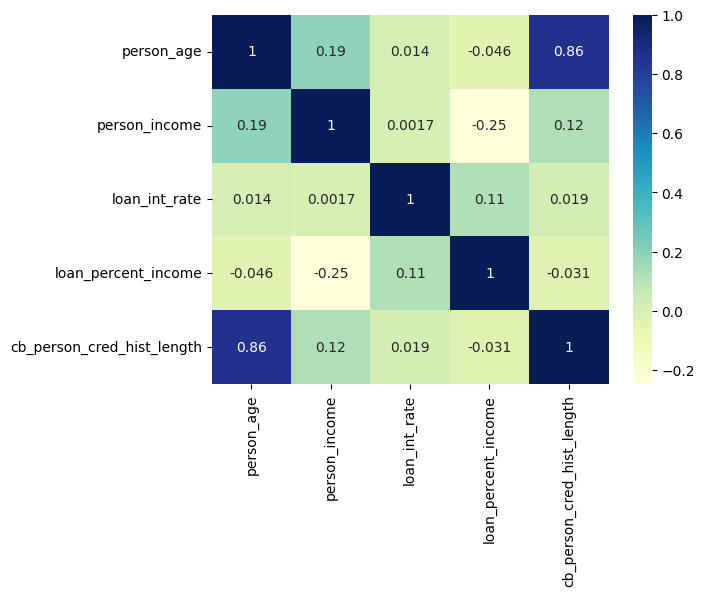

In [1008]:
# Plot the heatmap correlation
sns.heatmap(data = data_train_corr,
            cmap = "YlGnBu",
            annot = True)

#3. Initial Characteristic Analysis
3.1 Characteristic Binning

In [1009]:
# Create a function for binning the numerical predictor
def create_binning(data, predictor_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.


    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins)

    return data

In [1010]:
for column in num_columns:
  data_train_binned = create_binning(data = data_train,
                                     predictor_label = column,
                                     num_of_bins = 2)

In [1011]:
data_train_binned.T

,11491,3890,17344,13023,29565,22677,25029,23700,4299,29314,...,21156,24380,30751,31368,1376,22095,18736,1663,18257,10456
person_age,26,23,24,24,42,30,27,28,23,39,...,27,27,43,37,22,32,30,22,29,22
person_income,62000,39000,35000,86000,38400,46800,80000,62000,46500,65000,...,45000,72000,54000,44196,35100,38000,65000,20000,110000,30000
person_home_ownership,RENT,MORTGAGE,RENT,RENT,RENT,RENT,MORTGAGE,RENT,RENT,RENT,...,MORTGAGE,MORTGAGE,RENT,RENT,RENT,RENT,RENT,RENT,RENT,RENT
loan_grade,B,C,A,B,B,A,B,B,D,B,...,B,A,A,B,C,A,C,A,E,B
loan_int_rate,11.26,12.98,6.54,10.65,NaN,7.88,11.71,10.0,NaN,10.74,...,9.76,5.42,7.29,11.26,13.98,5.79,13.06,7.74,18.39,10.37
loan_percent_income,0.16,0.13,0.34,0.14,0.34,0.16,0.09,0.15,0.1,0.31,...,0.27,0.08,0.16,0.28,0.03,0.17,0.25,0.08,0.22,0.33
cb_person_default_on_file,N,N,N,N,N,N,N,N,Y,N,...,N,N,N,N,N,N,N,N,Y,N
cb_person_cred_hist_length,2,4,2,3,11,10,10,9,4,17,...,6,10,14,14,2,6,8,3,8,4
loan_status,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
person_age_bin,"(19.999, 26.0]","(19.999, 26.0]","(19.999, 26.0]","(19.999, 26.0]","(26.0, 144.0]","(26.0, 144.0]","(26.0, 144.0]","(26.0, 144.0]","(19.999, 26.0]","(26.0, 144.0]",...,"(26.0, 144.0]","(26.0, 144.0]","(26.0, 144.0]","(26.0, 144.0]","(19.999, 26.0]","(26.0, 144.0]","(26.0, 144.0]","(19.999, 26.0]","(26.0, 144.0]","(19.999, 26.0]"


In [1012]:
# Check for missing values
data_train_binned.isna().sum()

person_age                           0
person_income                        0
person_home_ownership                0
loan_grade                           0
loan_int_rate                     2200
loan_percent_income                  0
cb_person_default_on_file            0
cb_person_cred_hist_length           0
loan_status                          0
person_age_bin                       0
person_income_bin                    0
loan_int_rate_bin                 2200
loan_percent_income_bin              0
cb_person_cred_hist_length_bin       0
dtype: int64

In [1013]:
# # Define columns with missing values
# missing_columns = [
#                    'loan_int_rate_bin',
#                    'cb_person_cred_hist_length_bin']

# Define columns with missing values
missing_columns = ['loan_int_rate_bin']

In [1014]:
# Perform grouping for all columns
for column in missing_columns:

  # Add category 'Missing' to replace the missing values
  data_train_binned[column] = data_train_binned[column].cat.add_categories('Missing')

  # Replace missing values with category 'Missing'
  data_train_binned[column].fillna(value = 'Missing',
                                   inplace = True)

In [1015]:
# Sanity check
data_train_binned.isna().sum()

person_age                           0
person_income                        0
person_home_ownership                0
loan_grade                           0
loan_int_rate                     2200
loan_percent_income                  0
cb_person_default_on_file            0
cb_person_cred_hist_length           0
loan_status                          0
person_age_bin                       0
person_income_bin                    0
loan_int_rate_bin                    0
loan_percent_income_bin              0
cb_person_cred_hist_length_bin       0
dtype: int64

3.2 WoE and IV

In [1016]:
# Define the initial empty list
crosstab_num = []

for column in num_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column + "_bin"],
                         data_train_binned[response_variable],
                         margins = True)

  # Append to the list
  crosstab_num.append(crosstab)

In [1017]:
# Define the initial empty list
crosstab_cat = []

for column in cat_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column],
                         data_train_binned[response_variable],
                         margins = True)

  # Append to the list
  crosstab_cat.append(crosstab)

In [1018]:
# Put all two in a crosstab_list
crosstab_list = crosstab_num + crosstab_cat

crosstab_list

[loan_status         0     1    All
 person_age_bin                    
 (19.999, 26.0]   9678  2830  12508
 (26.0, 144.0]    8153  2145  10298
 All             17831  4975  22806,
 loan_status               0     1    All
 person_income_bin                       
 (3999.999, 55000.0]    7916  3490  11406
 (55000.0, 6000000.0]   9915  1485  11400
 All                   17831  4975  22806,
 loan_status            0     1    All
 loan_int_rate_bin                    
 (5.419, 10.99]      9163  1278  10441
 (10.99, 22.48]      6950  3215  10165
 Missing             1718   482   2200
 All                17831  4975  22806,
 loan_status                  0     1    All
 loan_percent_income_bin                    
 (-0.001, 0.15]           10537  1453  11990
 (0.15, 0.83]              7294  3522  10816
 All                      17831  4975  22806,
 loan_status                         0     1    All
 cb_person_cred_hist_length_bin                    
 (1.999, 4.0]                     9680  283

In [1019]:
# Define the initial list for WOE
WOE_list = []

# Define the initial list for IV
IV_list = []

# Create the initial table for IV
IV_table = pd.DataFrame({'Characteristic': [],
                         'Information Value' : []})

# Perform the algorithm for all crosstab
for crosstab in crosstab_list:

  # Calculate % Good
  crosstab['p_good'] = crosstab[0]/crosstab[0]['All']

  # Calculate % Bad
  crosstab['p_bad'] = crosstab[1]/crosstab[1]['All']

  # Calculate the WOE
  crosstab['WOE'] = np.log(crosstab['p_good']/crosstab['p_bad'])

  # Calculate the contribution value for IV
  crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']

  # Calculate the IV
  IV = crosstab['contribution'][:-1].sum()

  add_IV = {'Characteristic': crosstab.index.name,
            'Information Value': IV}

  WOE_list.append(crosstab)
  IV_list.append(add_IV)

In [1020]:
# Create initial table to summarize the WOE values
WOE_table = pd.DataFrame({'Characteristic': [],
                          'Attribute': [],
                          'WOE': []})

for i in range(len(crosstab_list)):

  # Define crosstab and reset index
  crosstab = crosstab_list[i].reset_index()

  # Save the characteristic name
  char_name = crosstab.columns[0]

  # Only use two columns (Attribute name and its WOE value)
  # Drop the last row (average/total WOE)
  crosstab = crosstab.iloc[:-1, [0,-2]]
  crosstab.columns = ['Attribute', 'WOE']

  # Add the characteristic name in a column
  crosstab['Characteristic'] = char_name

  WOE_table = pd.concat((WOE_table, crosstab),
                        axis = 0)

  # Reorder the column
  WOE_table.columns = ['Characteristic',
                       'Attribute',
                       'WOE']

WOE_table

,Characteristic,Attribute,WOE
0,person_age_bin,"(19.999, 26.0]",-0.046935
1,person_age_bin,"(26.0, 144.0]",0.058733
0,person_income_bin,"(3999.999, 55000.0]",-0.457529
1,person_income_bin,"(55000.0, 6000000.0]",0.622121
0,loan_int_rate_bin,"(5.419, 10.99]",0.693364
1,loan_int_rate_bin,"(10.99, 22.48]",-0.505599
2,loan_int_rate_bin,Missing,-0.005541
0,loan_percent_income_bin,"(-0.001, 0.15]",0.704749
1,loan_percent_income_bin,"(0.15, 0.83]",-0.548490
0,cb_person_cred_hist_length_bin,"(1.999, 4.0]",-0.046728


In [1021]:
# Put all IV in the table
IV_table = pd.DataFrame(IV_list)
IV_table

,Characteristic,Information Value
0,person_age_bin,0.002756
1,person_income_bin,0.278076
2,loan_int_rate_bin,0.307861
3,loan_percent_income_bin,0.374564
4,cb_person_cred_hist_length_bin,0.002732
5,person_home_ownership,0.386431
6,loan_grade,0.858398
7,cb_person_default_on_file,0.159914


In [1022]:
# Define the predictive power of each characteristic
strength = []

# Assign the rule of thumb regarding IV
for iv in IV_table['Information Value']:
  if iv < 0.02:
    strength.append('Weak')
  elif iv >= 0.02 and iv < 0.1:
    strength.append('Weak')
  elif iv >= 0.1 and iv < 0.25:
    strength.append('Medium')
  elif iv >= 0.25 and iv < 0.4:
    strength.append('Strong')
  else:
    strength.append('Very strong')

# Assign the strength to each characteristic
IV_table = IV_table.assign(Strength = strength)

# Sort the table by the IV values
IV_table.sort_values(by='Information Value')

,Characteristic,Information Value,Strength
4,cb_person_cred_hist_length_bin,0.002732,Weak
0,person_age_bin,0.002756,Weak
7,cb_person_default_on_file,0.159914,Medium
1,person_income_bin,0.278076,Strong
2,loan_int_rate_bin,0.307861,Strong
3,loan_percent_income_bin,0.374564,Strong
5,person_home_ownership,0.386431,Strong
6,loan_grade,0.858398,Very strong


3.3 Check Logical Trend and Business Consideration

In [1023]:
# Create a funtion to plot the WOE
def plot_WOE(crosstab):
  """
  Function to plot the WOE trend.

  Parameters
  ----------
  crosstab : DataFrame
    The cross tabulation of the characteristic.

  """
  # Define the plot size
  plt.figure(figsize = (8,4))

  # Plot the WOE
  sns.pointplot(x = crosstab.T.columns,
                y = 'WOE',
                data = crosstab,
                markers = 'o',
                linestyles = '--',
                color = 'blue')

  # Rotate the label of x-axis
  plt.xticks(rotation = 20)

crosstab_list

[loan_status         0     1    All    p_good     p_bad       WOE  contribution
 person_age_bin                                                                
 (19.999, 26.0]   9678  2830  12508  0.542763  0.568844 -0.046935      0.001224
 (26.0, 144.0]    8153  2145  10298  0.457237  0.431156  0.058733      0.001532
 All             17831  4975  22806  1.000000  1.000000  0.000000      0.000000,
 loan_status               0     1    All    p_good     p_bad       WOE  \
 person_income_bin                                                        
 (3999.999, 55000.0]    7916  3490  11406  0.443946  0.701508 -0.457529   
 (55000.0, 6000000.0]   9915  1485  11400  0.556054  0.298492  0.622121   
 All                   17831  4975  22806  1.000000  1.000000  0.000000   
 
 loan_status           contribution  
 person_income_bin                   
 (3999.999, 55000.0]       0.117842  
 (55000.0, 6000000.0]      0.160234  
 All                       0.000000  ,
 loan_status            0     1

3.4 Person Age Bin

In [1024]:
# Define the crosstab
crosstab_person_age_bin = crosstab_list[0]

crosstab_person_age_bin

loan_status,0,1,All,p_good,p_bad,WOE,contribution
person_age_bin,,,,,,,
"(19.999, 26.0]",9678,2830,12508,0.542763,0.568844,-0.046935,0.001224
"(26.0, 144.0]",8153,2145,10298,0.457237,0.431156,0.058733,0.001532
All,17831,4975,22806,1.000000,1.000000,0.000000,0.000000


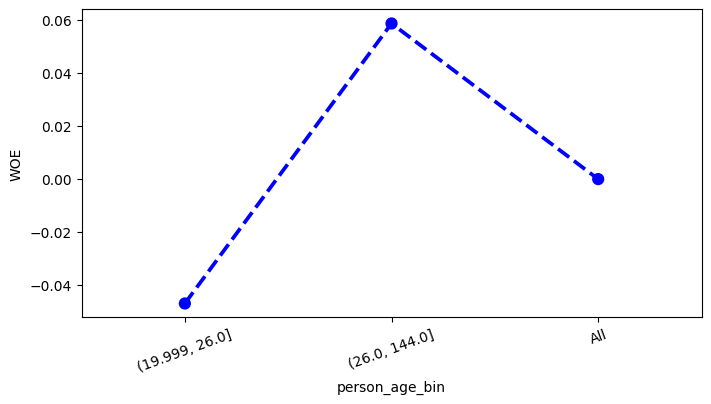

In [1025]:
# Plot the WOE
plot_WOE(crosstab_person_age_bin)

3.5 Person Income Bin

In [1026]:
# Define the crosstab
crosstab_person_income_bin = crosstab_list[1]

crosstab_person_income_bin

loan_status,0,1,All,p_good,p_bad,WOE,contribution
person_income_bin,,,,,,,
"(3999.999, 55000.0]",7916,3490,11406,0.443946,0.701508,-0.457529,0.117842
"(55000.0, 6000000.0]",9915,1485,11400,0.556054,0.298492,0.622121,0.160234
All,17831,4975,22806,1.000000,1.000000,0.000000,0.000000


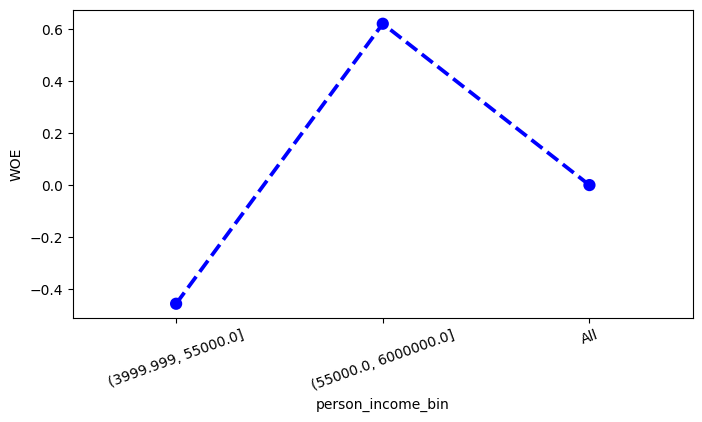

In [1027]:
# Plot the WOE
plot_WOE(crosstab_person_income_bin)

3.6 Loan Int Rate Bin

In [1028]:
# Define the crosstab
crosstab_loan_int_rate_bin = crosstab_list[2]

crosstab_loan_int_rate_bin

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_int_rate_bin,,,,,,,
"(5.419, 10.99]",9163,1278,10441,0.513880,0.256884,0.693364,0.178192
"(10.99, 22.48]",6950,3215,10165,0.389771,0.646231,-0.505599,0.129666
Missing,1718,482,2200,0.096349,0.096884,-0.005541,0.000003
All,17831,4975,22806,1.000000,1.000000,0.000000,0.000000


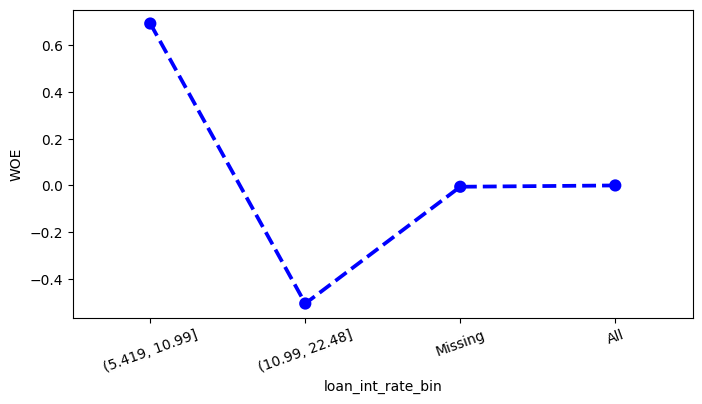

In [1029]:
# Plot the WOE
plot_WOE(crosstab_loan_int_rate_bin)

3.8 Loan Percent Income Bin

In [1030]:
# Define the crosstab
crosstab_loan_percent_income_bin = crosstab_list[3]

crosstab_loan_percent_income_bin

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_percent_income_bin,,,,,,,
"(-0.001, 0.15]",10537,1453,11990,0.590937,0.29206,0.704749,0.210633
"(0.15, 0.83]",7294,3522,10816,0.409063,0.70794,-0.548490,0.163931
All,17831,4975,22806,1.000000,1.00000,0.000000,0.000000


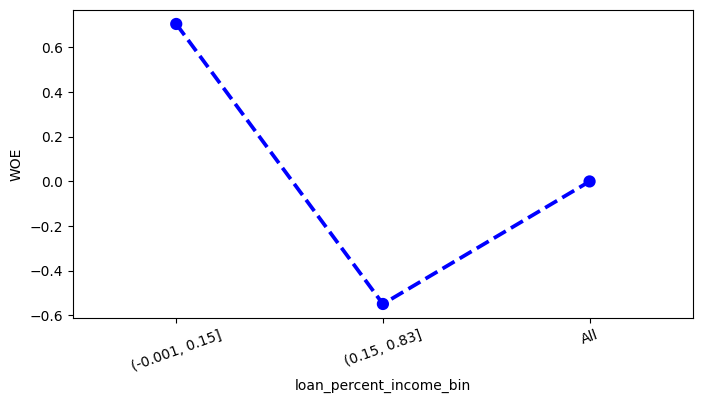

In [1031]:
# Plot the WOE
plot_WOE(crosstab_loan_percent_income_bin)

3.9 Cb Person Cred Hist Length Bin

In [1032]:
# Define the crosstab
crosstab_cb_person_cred_hist_length_bin = crosstab_list[4]

crosstab_cb_person_cred_hist_length_bin

loan_status,0,1,All,p_good,p_bad,WOE,contribution
cb_person_cred_hist_length_bin,,,,,,,
"(1.999, 4.0]",9680,2830,12510,0.542875,0.568844,-0.046728,0.001213
"(4.0, 30.0]",8151,2145,10296,0.457125,0.431156,0.058488,0.001519
All,17831,4975,22806,1.000000,1.000000,0.000000,0.000000


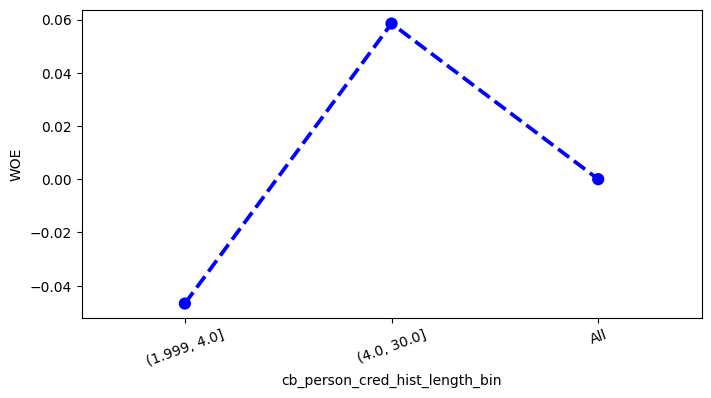

In [1033]:
# Plot the WOE
plot_WOE(crosstab_cb_person_cred_hist_length_bin)

3.10 Person Home Ownership

In [1034]:
# Define the crosstab
crosstab_person_home_ownership = crosstab_list[5]

crosstab_person_home_ownership

loan_status,0,1,All,p_good,p_bad,WOE,contribution
person_home_ownership,,,,,,,
MORTGAGE,8227,1180,9407,0.461387,0.237186,0.665394,0.149182
OTHER,52,27,79,0.002916,0.005427,-0.621106,0.001560
OWN,1692,130,1822,0.094891,0.026131,1.289619,0.088675
RENT,7860,3638,11498,0.440805,0.731256,-0.506161,0.147015
All,17831,4975,22806,1.000000,1.000000,0.000000,0.000000


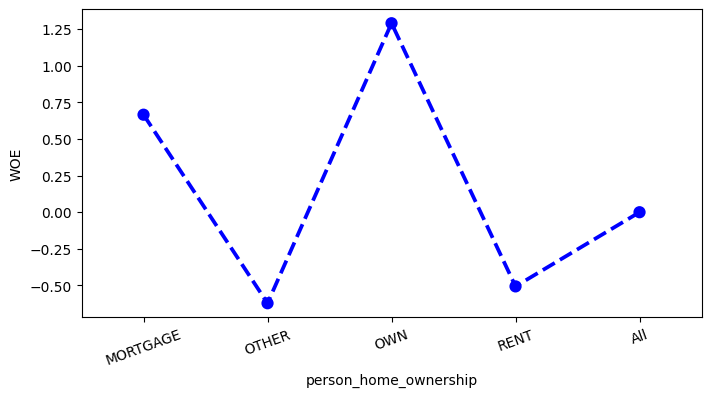

In [1035]:
# Plot the WOE
plot_WOE(crosstab_person_home_ownership)

3.10 Loan Grade

In [1036]:
# Define the crosstab
crosstab_loan_grade = crosstab_list[6]

crosstab_loan_grade

loan_status,0,1,All,p_good,p_bad,WOE,contribution
loan_grade,,,,,,,
A,6766,764,7530,0.379452,0.153568,0.904584,0.204331
B,6102,1208,7310,0.342213,0.242814,0.343137,0.034107
C,3647,928,4575,0.204531,0.186533,0.092115,0.001658
D,1022,1474,2496,0.057316,0.296281,-1.642731,0.392556
E,242,434,676,0.013572,0.087236,-1.860620,0.137061
F,51,128,179,0.002860,0.025729,-2.196718,0.050236
G,1,39,40,0.000056,0.007839,-4.940075,0.038449
All,17831,4975,22806,1.000000,1.000000,0.000000,0.000000


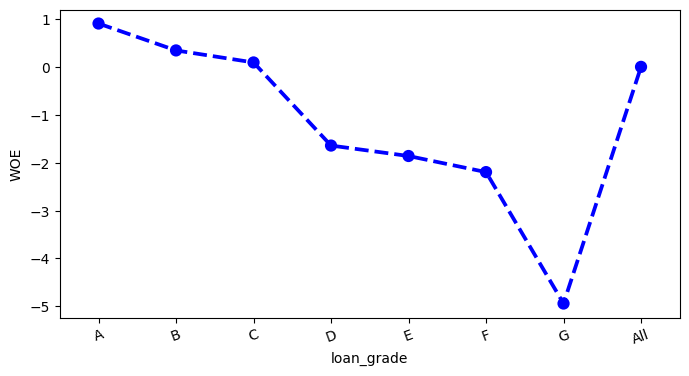

In [1037]:
# Plot the WOE
plot_WOE(crosstab_loan_grade)

3.11 Cb Person Default on File

In [1038]:
# Define the crosstab
crosstab_cb_person_default_on_file = crosstab_list[7]

crosstab_cb_person_default_on_file

loan_status,0,1,All,p_good,p_bad,WOE,contribution
cb_person_default_on_file,,,,,,,
N,15302,3456,18758,0.858168,0.694673,0.211359,0.034556
Y,2529,1519,4048,0.141832,0.305327,-0.766741,0.125358
All,17831,4975,22806,1.000000,1.000000,0.000000,0.000000


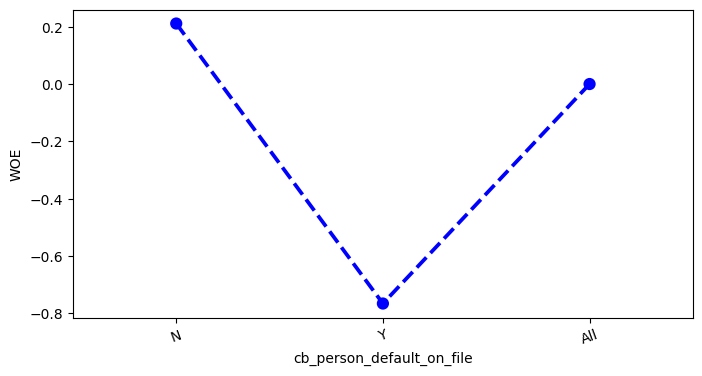

In [1039]:
# Plot the WOE
plot_WOE(crosstab_cb_person_default_on_file)

3.12 Test of Independence

In [1040]:
char_list = IV_table['Characteristic'].tolist()
char_list

['person_age_bin',
 'person_income_bin',
 'loan_int_rate_bin',
 'loan_percent_income_bin',
 'cb_person_cred_hist_length_bin',
 'person_home_ownership',
 'loan_grade',
 'cb_person_default_on_file']

In [1041]:
# Display the IV Table
IV_table

,Characteristic,Information Value,Strength
0,person_age_bin,0.002756,Weak
1,person_income_bin,0.278076,Strong
2,loan_int_rate_bin,0.307861,Strong
3,loan_percent_income_bin,0.374564,Strong
4,cb_person_cred_hist_length_bin,0.002732,Weak
5,person_home_ownership,0.386431,Strong
6,loan_grade,0.858398,Very strong
7,cb_person_default_on_file,0.159914,Medium


In [1042]:
# Import the libraries
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Create a function of independence test
def independence_test(data, characteristic_label, alpha=0.05):
    """
    Function to perform the independence test.

    Parameters
    ----------
    data : array like
      The name of dataset.

    characteristic_label : object
      The label of characteristic variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    Return
    ------
    res : dataframe
      The summary result of the independence test.

    """
    # Build the contingency table
    crosstab = pd.crosstab(data[characteristic_label],
                           data[response_variable],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        conclusion = 'Not Independent'
    else:
        conclusion = 'Independent'

    # Tabulate the results
    res = pd.DataFrame({'Characteristic': characteristic_label,
                        'Chi-stat': round(stat,2),
                        'P-value': pval,
                        'Conclusion': conclusion},
                       index = [0])

    return res

In [1043]:
# Define initial table to summarize the test result
ind_table = pd.DataFrame({'Characteristic': [],
                        'Chi-stat': [],
                        'P-value': [],
                        'Conclusion': []})

# Perform independence test for all characteristics
for characteristic in char_list:

  # Perform the independence test
  test_result = independence_test(data = data_train_binned,
                                  characteristic_label = characteristic,
                                  alpha = 0.05)

  # # Append test result to the table
  ind_table = pd.concat((ind_table, test_result),
                        axis = 0,
                        ignore_index = True)

In [1044]:
# Check the results
ind_table

,Characteristic,Chi-stat,P-value,Conclusion
0,person_age_bin,10.58,1.143643e-03,Not Independent
1,person_income_bin,1031.12,3.093601e-226,Not Independent
2,loan_int_rate_bin,1135.15,3.202370e-247,Not Independent
3,loan_percent_income_bin,1392.33,9.741934e-305,Not Independent
4,cb_person_cred_hist_length_bin,10.49,1.201289e-03,Not Independent
5,person_home_ownership,1362.16,4.790150e-295,Not Independent
6,loan_grade,3862.41,0.000000e+00,Not Independent
7,cb_person_default_on_file,711.08,1.166741e-156,Not Independent


#4. Design Scorecards
4.1 Pre-processing Training Set

In [1045]:
# Function to generate the WOE mapping dictionary
def get_woe_map_dict(WOE_table):

    # Initialize the dictionary
    WOE_map_dict = {}
    WOE_map_dict['Missing'] = {}

    unique_char = set(WOE_table['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (WOE_table
                            [WOE_table['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'WOE']])                 # Then select the attribute & WOE

        # Get the mapping
        WOE_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            woe = current_data.loc[idx, 'WOE']

            if attribute == 'Missing':
                WOE_map_dict['Missing'][char] = woe
            else:
                WOE_map_dict[char][attribute] = woe
                WOE_map_dict['Missing'][char] = np.nan

    # Validate data
    print('Number of key : ', len(WOE_map_dict.keys()))

    return WOE_map_dict


In [1046]:
# Generate the WOE map dictionary
WOE_map_dict = get_woe_map_dict(WOE_table = WOE_table)
WOE_map_dict

Number of key :  9


{'Missing': {'cb_person_cred_hist_length_bin': nan,
  'loan_percent_income_bin': nan,
  'person_age_bin': nan,
  'loan_grade': nan,
  'person_home_ownership': nan,
  'loan_int_rate_bin': -0.005541156447753005,
  'person_income_bin': nan,
  'cb_person_default_on_file': nan},
 'cb_person_cred_hist_length_bin': {Interval(1.999, 4.0, closed='right'): -0.04672795530801427,
  Interval(4.0, 30.0, closed='right'): 0.0584879217909866},
 'loan_percent_income_bin': {Interval(-0.001, 0.15, closed='right'): 0.7047493430878912,
  Interval(0.15, 0.83, closed='right'): -0.5484900626288794},
 'person_age_bin': {Interval(19.999, 26.0, closed='right'): -0.04693458822537287,
  Interval(26.0, 144.0, closed='right'): 0.058733260359439904},
 'loan_grade': {'A': 0.9045844152327798,
  'B': 0.34313734184050115,
  'C': 0.09211531308112622,
  'D': -1.6427314469269856,
  'E': -1.860619952885072,
  'F': -2.1967177761366448,
  'G': -4.940074791071},
 'person_home_ownership': {'MORTGAGE': 0.6653938447678664,
  'OTHER

In [1047]:
# Function to replace the raw data in the train set with WOE values
def transform_woe(raw_data, WOE_dict, num_cols):

    woe_data = raw_data.copy()

    # Map the raw data
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].map(WOE_map_dict[map_col])

    # Map the raw data if there is a missing value or out of range value
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].fillna(value=WOE_map_dict['Missing'][map_col])

    return woe_data

In [1048]:
# Transform the X_train
woe_train = transform_woe(raw_data = X_train,
                          WOE_dict = WOE_map_dict,
                          num_cols = num_columns)

woe_train

,person_age,person_income,person_home_ownership,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
11491,-0.046935,0.622121,-0.506161,0.343137,-0.505599,-0.548490,0.211359,-0.046728
3890,-0.046935,-0.457529,0.665394,0.092115,-0.505599,0.704749,0.211359,-0.046728
17344,-0.046935,-0.457529,-0.506161,0.904584,0.693364,-0.548490,0.211359,-0.046728
13023,-0.046935,0.622121,-0.506161,0.343137,0.693364,0.704749,0.211359,-0.046728
29565,0.058733,-0.457529,-0.506161,0.343137,-0.005541,-0.548490,0.211359,0.058488
...,...,...,...,...,...,...,...,...
22095,0.058733,-0.457529,-0.506161,0.904584,0.693364,-0.548490,0.211359,0.058488
18736,0.058733,0.622121,-0.506161,0.092115,-0.505599,-0.548490,0.211359,0.058488
1663,-0.046935,-0.457529,-0.506161,0.904584,0.693364,0.704749,0.211359,-0.046728
18257,0.058733,0.622121,-0.506161,-1.860620,-0.505599,-0.548490,-0.766741,0.058488


4.2 Pre-processing Testing Set

In [1049]:
# Transform the X_test
woe_test = transform_woe(raw_data = X_test,
                         WOE_dict = WOE_map_dict,
                         num_cols = num_columns)

woe_test

,person_age,person_income,person_home_ownership,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28004,0.058733,0.622121,0.665394,-1.642731,-0.505599,-0.548490,0.211359,0.058488
15942,-0.046935,-0.457529,-0.506161,0.904584,0.693364,-0.548490,0.211359,-0.046728
26343,0.058733,0.622121,1.289619,0.092115,-0.505599,0.704749,-0.766741,0.058488
16374,-0.046935,0.622121,0.665394,0.092115,-0.505599,0.704749,0.211359,-0.046728
27301,0.058733,0.622121,0.665394,0.904584,0.693364,0.704749,0.211359,0.058488
...,...,...,...,...,...,...,...,...
21232,0.058733,-0.457529,0.665394,0.092115,-0.005541,-0.548490,-0.766741,0.058488
22172,0.058733,-0.457529,-0.506161,0.092115,-0.505599,-0.548490,-0.766741,0.058488
2214,-0.046935,-0.457529,-0.506161,0.343137,-0.505599,-0.548490,0.211359,-0.046728
20705,0.058733,-0.457529,-0.506161,0.904584,0.693364,0.704749,0.211359,0.058488


4.3 Logistic Regression Modeling

In [1050]:
# Rename the raw X_train for the future
raw_train = X_train
raw_train

,person_age,person_income,person_home_ownership,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
11491,26,62000,RENT,B,11.26,0.16,N,2
3890,23,39000,MORTGAGE,C,12.98,0.13,N,4
17344,24,35000,RENT,A,6.54,0.34,N,2
13023,24,86000,RENT,B,10.65,0.14,N,3
29565,42,38400,RENT,B,NaN,0.34,N,11
...,...,...,...,...,...,...,...,...
22095,32,38000,RENT,A,5.79,0.17,N,6
18736,30,65000,RENT,C,13.06,0.25,N,8
1663,22,20000,RENT,A,7.74,0.08,N,3
18257,29,110000,RENT,E,18.39,0.22,Y,8


In [1051]:
# Define X_train
X_train = woe_train.to_numpy()
X_train

array([[-0.04693459,  0.62212084, -0.50616062, ..., -0.54849006,
         0.21135854, -0.04672796],
       [-0.04693459, -0.45752885,  0.66539384, ...,  0.70474934,
         0.21135854, -0.04672796],
       [-0.04693459, -0.45752885, -0.50616062, ..., -0.54849006,
         0.21135854, -0.04672796],
       ...,
       [-0.04693459, -0.45752885, -0.50616062, ...,  0.70474934,
         0.21135854, -0.04672796],
       [ 0.05873326,  0.62212084, -0.50616062, ..., -0.54849006,
        -0.7667414 ,  0.05848792],
       [-0.04693459, -0.45752885, -0.50616062, ..., -0.54849006,
         0.21135854, -0.04672796]])

In [1052]:
# Check y_train
y_train = y_train.to_numpy()
y_train

array([0, 0, 1, ..., 0, 0, 1])

In [1053]:
# Import library
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [1054]:
def forward(X, y, predictors, scoring='roc_auc', cv=10):
    """
    Function to perform forward selection procedure.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
      All predictors set.

    y : {array-like} of shape (n_sample, )
      The dependent or response variable.

    predictors : {array-like} of shape (n_sample, )
      Index of predictors

    scoring : a single {str}, default='roc_auc'
      The scoring parameter based on scikit-learn cross_validate documentation.

    cv : int, default=5
      Number of folds for k-Fold CV.

    Returns
    -------
    models : {array-like} of shape (n_combinations, k)
      Summary of predictors and its AIC score for each possible combination.

    best_model : {array-like} of shape (2, )
      Best model of models with the smallest AIC score.
    """

    # Initialize list of results
    results = []

    # Define sample size and  number of all predictors
    n_samples, n_predictors = X.shape

    # Define list of all predictors
    col_list = np.arange(n_predictors)

    # Define remaining predictors for each k
    remaining_predictors = [p for p in col_list if p not in predictors]

    # Initialize list of predictors and its CV Score
    pred_list = []
    score_list = []

    # Cross validate each possible combination of remaining predictors
    for p in remaining_predictors:
        combi = predictors + [p]

        # Extract predictors combination
        X_ = X[:, combi]
        y_ = y

        # Define the estimator
        model = LogisticRegression(penalty = None,
                                   class_weight = 'balanced')

        # Cross validate the recall scores of the model
        cv_results = cross_validate(estimator = model,
                                    X = X_,
                                    y = y_,
                                    scoring = scoring,
                                    cv = cv)

        # Calculate the average CV/recall score
        score_ = np.mean(cv_results['test_score'])

        # Append predictors combination and its CV Score to the list
        pred_list.append(list(combi))
        score_list.append(score_)

    # Tabulate the results
    models = pd.DataFrame({"Predictors": pred_list,
                           "Recall": score_list})

    # Choose the best model
    best_model = models.loc[models['Recall'].argmax()]

    return models, best_model

In [1055]:
# Define predictor for the null model
predictor = []

# The predictor in the null model is zero values for all predictors
X_null = np.zeros((X_train.shape[0], 1))

# Define the estimator
model = LogisticRegression(penalty = None,
                           class_weight = 'balanced')

# Cross validate
cv_results = cross_validate(estimator = model,
                            X = X_null,
                            y = y_train,
                            cv = 20,
                            scoring = 'recall')

# Calculate the average CV/recall score
score_ = np.mean(cv_results['test_score'])

# Create table for the best model of each k predictors
# Append the results of null model
forward_models = pd.DataFrame({"Predictors": [predictor],
                               "Recall": [score_]})

In [1056]:
# Display the table
forward_models

,Predictors,Recall
0,[],0.0


In [1057]:
# Define list of predictors
predictors = []
n_predictors = X_train.shape[1]

# Perform forward selection procedure for k=1,...,11 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train,
                            y = y_train,
                            predictors = predictors,
                            scoring = 'recall',
                            cv = 20)

    # Tabulate the best model of each k predictors
    forward_models.loc[k+1] = best_model
    predictors = best_model['Predictors']

In [1058]:
# Display the results
forward_models

,Predictors,Recall
0,[],0.000000
1,[4],0.743110
2,"[4, 0]",0.701504
3,"[4, 0, 7]",0.701504
4,"[4, 0, 7, 6]",0.674168
5,"[4, 0, 7, 6, 2]",0.612251
6,"[4, 0, 7, 6, 2, 5]",0.794390
7,"[4, 0, 7, 6, 2, 5, 3]",0.779904
8,"[4, 0, 7, 6, 2, 5, 3, 1]",0.780513


In [1059]:
# Find the best Recall score
best_idx = forward_models['Recall'].argmax()
best_recall = forward_models['Recall'].loc[best_idx]
best_predictors = forward_models['Predictors'].loc[best_idx]

# Print the summary
print('Best index            :', best_idx)
print('Best Recall           :', best_recall)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(raw_train.columns[best_predictors].tolist())

Best index            : 6
Best Recall           : 0.794390465086151
Best predictors (idx) : [4, 0, 7, 6, 2, 5]
Best predictors       :
['loan_int_rate', 'person_age', 'cb_person_cred_hist_length', 'cb_person_default_on_file', 'person_home_ownership', 'loan_percent_income']


In [1060]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(penalty = None,
                                class_weight = 'balanced')
best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced', penalty=None)

In [1061]:
best_model_intercept = pd.DataFrame({'Estimate': best_model.intercept_},
                                    index = ["Intercept"])
best_model_intercept

,Estimate
Intercept,-0.003108


In [1062]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Estimate':  np.reshape(best_model.coef_, best_idx)},
                                index = best_model_params)

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0)

best_model_summary

,Estimate
Intercept,-0.003108
loan_int_rate,-0.824627
person_age,-0.287263
cb_person_cred_hist_length,-0.283222
cb_person_default_on_file,-0.561709
person_home_ownership,-0.908300
loan_percent_income,-0.966957


4.4 Model Evaluation

In [1063]:
# Predict class labels for sample in X_train.
y_train_pred = best_model.predict(X_train_best)
y_train_pred

array([1, 0, 1, ..., 0, 1, 1])

In [1064]:
# Import metrics package
from sklearn.metrics import recall_score

In [1065]:
# Calculate the recall score on the train set
recall_train = recall_score(y_true = y_train,
                            y_pred = y_train_pred)

recall_train

0.7943718592964825

In [1066]:
# Predict the probability estimates
y_train_pred_proba = best_model.predict_proba(X_train_best)[:,[1]]
y_train_pred_proba

array([[0.78783577],
       [0.27607369],
       [0.58011152],
       ...,
       [0.29139946],
       [0.85829281],
       [0.58011152]])

<Axes: ylabel='Count'>

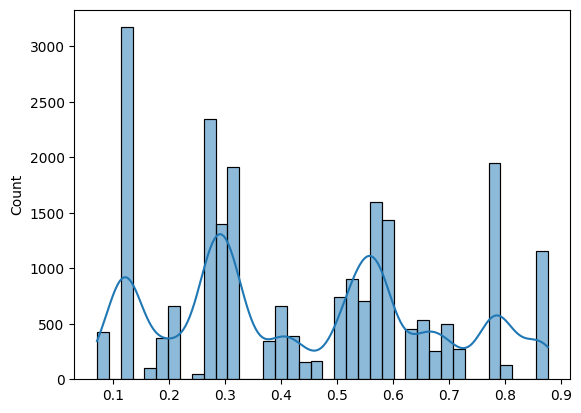

In [1067]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_train_pred_proba,
                            y_train.shape[0]),
             kde = True)

In [1068]:
# Rename the raw X_test for the future
raw_test = X_test

In [1069]:
# Define X_test
X_test = woe_test.to_numpy()
X_test

array([[ 0.05873326,  0.62212084,  0.66539384, ..., -0.54849006,
         0.21135854,  0.05848792],
       [-0.04693459, -0.45752885, -0.50616062, ..., -0.54849006,
         0.21135854, -0.04672796],
       [ 0.05873326,  0.62212084,  1.28961894, ...,  0.70474934,
        -0.7667414 ,  0.05848792],
       ...,
       [-0.04693459, -0.45752885, -0.50616062, ..., -0.54849006,
         0.21135854, -0.04672796],
       [ 0.05873326, -0.45752885, -0.50616062, ...,  0.70474934,
         0.21135854,  0.05848792],
       [ 0.05873326,  0.62212084,  0.66539384, ..., -0.54849006,
         0.21135854,  0.05848792]])

In [1070]:
# Check y_test
y_test = y_test.to_numpy()
y_test

array([1, 1, 0, ..., 1, 0, 0])

In [1071]:
# Define X_test with best predictors
X_test_best = X_test[:, best_predictors]

# Predict class labels for sample in X_test.
y_test_pred = best_model.predict(X_test_best)
y_test_pred

array([1, 1, 0, ..., 1, 0, 0])

In [1072]:
# Calculate the recall score on the test set
recall_test = recall_score(y_true = y_test,
                           y_pred = y_test_pred)

recall_test

0.796530707923113

In [1073]:
# Predict the probability estimates
y_test_pred_proba = best_model.predict_proba(X_test_best)[:,[1]]
y_test_pred_proba

array([[0.54677594],
       [0.58011152],
       [0.26081211],
       ...,
       [0.78783577],
       [0.27913612],
       [0.44405799]])

<Axes: ylabel='Count'>

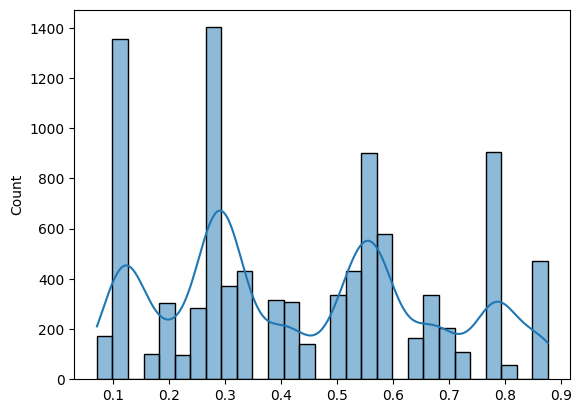

In [1074]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_test_pred_proba,
                            y_test.shape[0]),
             kde = True)

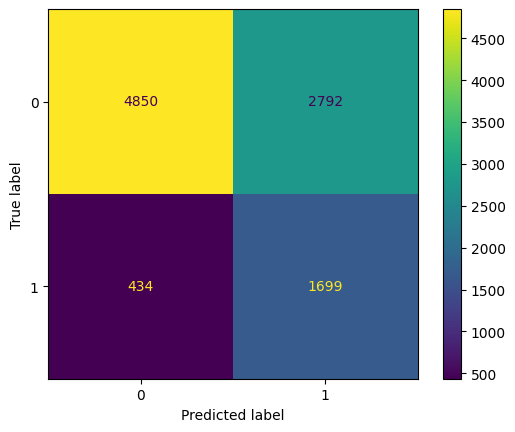

In [1075]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

4.5 Model Adjustment

In [1076]:
best_predictors = forward_models['Predictors'].loc[len(predictors)]

In [1077]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(penalty = None,
                                class_weight = 'balanced')
best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced', penalty=None)

In [1078]:
best_model_intercept = pd.DataFrame({'Characteristic': 'Intercept',
                                     'Estimate': best_model.intercept_})
best_model_intercept

,Characteristic,Estimate
0,Intercept,-0.028782


In [1079]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Characteristic':  best_model_params,
                                 'Estimate':        np.reshape(best_model.coef_,
                                                               len(best_predictors))})

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0,
                               ignore_index = True)

best_model_summary

,Characteristic,Estimate
0,Intercept,-0.028782
1,loan_int_rate,0.044850
2,person_age,-0.106704
3,cb_person_cred_hist_length,-0.104566
4,cb_person_default_on_file,0.028670
5,person_home_ownership,-0.827973
6,loan_percent_income,-0.868034
7,loan_grade,-1.117395
8,person_income,-0.850999


In [1080]:
# Predict class labels for sample in X_train.
y_train_pred = best_model.predict(X_train_best)
y_train_pred

array([0, 0, 1, ..., 0, 1, 1])

In [1081]:
# Calculate the recall score on the train set
recall_train = recall_score(y_true = y_train,
                            y_pred = y_train_pred)

recall_train

0.7845226130653267

In [1082]:
# Using method sklearn.metrics.roc_curve
from sklearn import metrics

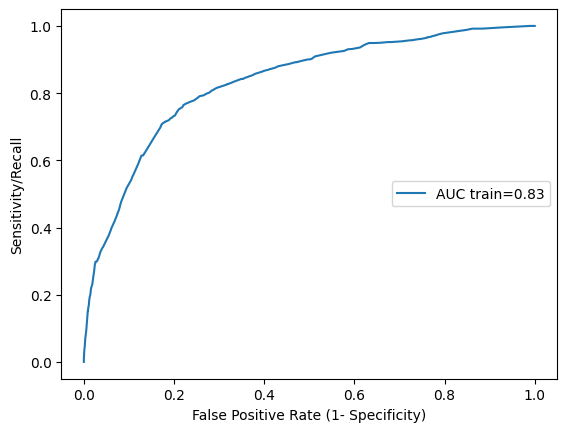

In [1083]:
# Predict probability of default on X_train
y_train_pred_proba = best_model.predict_proba(X_train_best)

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr, tpr, threshold = metrics.roc_curve(y_true = y_train,
                                        y_score = y_train_pred_proba[:,1])

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc_train = metrics.roc_auc_score(y_true = y_train,
                                  y_score = y_train_pred_proba[:,1])
auc_train = round(auc_train, 2)

# Plot ROC and its AUC
plt.plot(fpr,
         tpr,
         label = "AUC train="+str(auc_train))

plt.ylabel("Sensitivity/Recall")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 5)
plt.show()

In [1084]:
# Install and import library to plot KS
!pip install scikit-plot
import scikitplot as skplt

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

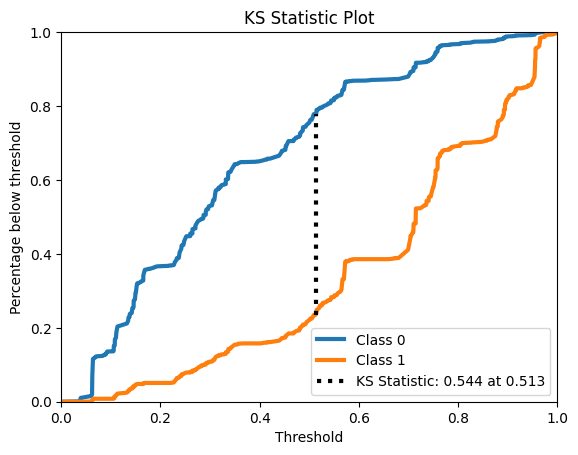

In [1085]:
# Plot KS Statistic
skplt.metrics.plot_ks_statistic(y_train,
                                y_train_pred_proba)

In [1086]:
# Define X_test with best predictors
X_test_best = X_test[:, best_predictors]

# Predict class labels for sample in X_test.
y_test_pred = best_model.predict(X_test_best)
y_test_pred

array([1, 1, 0, ..., 1, 0, 0])

In [1087]:
# Calculate the recall score on the test set
recall_test = recall_score(y_true = y_test,
                           y_pred = y_test_pred)

recall_test

0.7876230661040787

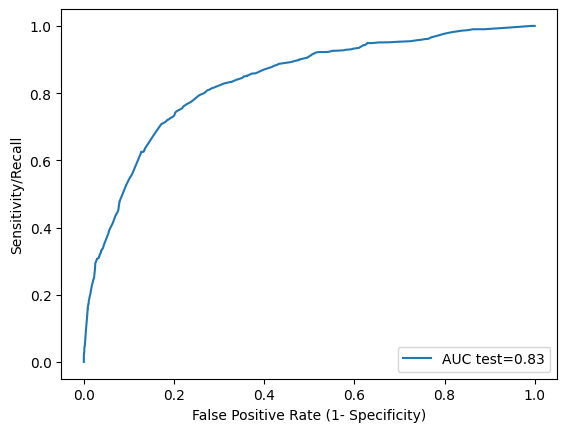

In [1088]:
# Predict probability of default on X_test
y_test_pred_proba = best_model.predict_proba(X_test_best)

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr_, tpr_, threshold_ = metrics.roc_curve(y_true = y_test,
                                           y_score = y_test_pred_proba[:,1])

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc_test = metrics.roc_auc_score(y_true = y_test,
                                 y_score = y_test_pred_proba[:,1])
auc_test = round(auc_test, 2)

# Plot ROC and its AUC
plt.plot(fpr_,
         tpr_,
         label = "AUC test="+str(auc_test))

plt.ylabel("Sensitivity/Recall")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

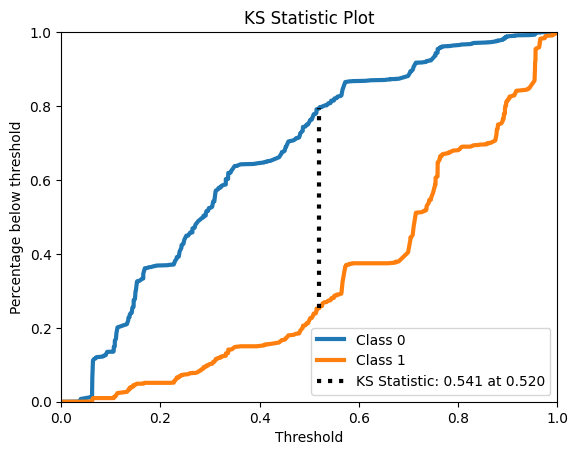

In [1089]:
# Plot KS Statistic
skplt.metrics.plot_ks_statistic(y_test,
                                y_test_pred_proba)

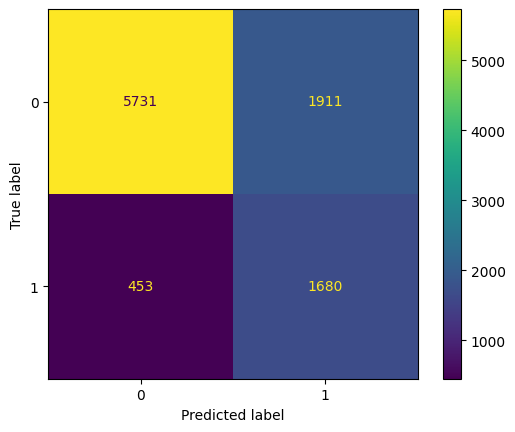

In [1090]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

#5. Scaling
5.1 Create Scorecards

In [1091]:
# Define Factor and Offset
factor = 20/np.log(2)
offset = 300-(factor*np.log(30))

print(f"Offset = {offset:.2f}")
print(f"Factor = {factor:.2f}")

Offset = 201.86
Factor = 28.85


In [1092]:
# Define n = number of characteristics
n = len(best_predictors)

# Define b0
b0 = best_model.intercept_[0]

print(f"n = {n}")
print(f"b0 = {b0:.4f}")

n = 8
b0 = -0.0288


In [1093]:
# Adjust characteristic name in best_model_summary_table
for col in best_model_summary['Characteristic']:
  if col in num_columns:
    bin_col = col + '_bin'
  else:
    bin_col = col
  best_model_summary.replace(col, bin_col, inplace = True)


# Merge tables to get beta_i for each characteristic
scorecards = pd.merge(left = WOE_table,
                      right = best_model_summary,
                      how = 'left',
                      on = ['Characteristic'])

scorecards.head()

,Characteristic,Attribute,WOE,Estimate
0,person_age_bin,"(19.999, 26.0]",-0.046935,-0.106704
1,person_age_bin,"(26.0, 144.0]",0.058733,-0.106704
2,person_income_bin,"(3999.999, 55000.0]",-0.457529,-0.850999
3,person_income_bin,"(55000.0, 6000000.0]",0.622121,-0.850999
4,loan_int_rate_bin,"(5.419, 10.99]",0.693364,0.044850


In [1094]:
# Define beta and WOE
beta = scorecards['Estimate']
WOE = scorecards['WOE']

# Calculate the score point for each attribute
scorecards['Points'] = (offset/n) - factor*((b0/n) + (beta*WOE))
scorecards['Points'] = scorecards['Points'].astype('int')

scorecards

,Characteristic,Attribute,WOE,Estimate,Points
0,person_age_bin,"(19.999, 26.0]",-0.046935,-0.106704,25
1,person_age_bin,"(26.0, 144.0]",0.058733,-0.106704,25
2,person_income_bin,"(3999.999, 55000.0]",-0.457529,-0.850999,14
3,person_income_bin,"(55000.0, 6000000.0]",0.622121,-0.850999,40
4,loan_int_rate_bin,"(5.419, 10.99]",0.693364,0.044850,24
5,loan_int_rate_bin,"(10.99, 22.48]",-0.505599,0.044850,25
6,loan_int_rate_bin,Missing,-0.005541,0.044850,25
7,loan_percent_income_bin,"(-0.001, 0.15]",0.704749,-0.868034,42
8,loan_percent_income_bin,"(0.15, 0.83]",-0.548490,-0.868034,11
9,cb_person_cred_hist_length_bin,"(1.999, 4.0]",-0.046728,-0.104566,25


In [1095]:
# Calculate the min and max points for each characteristic
grouped_char = scorecards.groupby('Characteristic')
grouped_points = grouped_char['Points'].agg(['min', 'max'])
grouped_points

,min,max
Characteristic,,
cb_person_cred_hist_length_bin,25,25
cb_person_default_on_file,25,25
loan_grade,-133,54
loan_int_rate_bin,24,25
loan_percent_income_bin,11,42
person_age_bin,25,25
person_home_ownership,10,56
person_income_bin,14,40


In [1096]:
# Calculate the min and max score from the scorecards
total_points = grouped_points.sum()
min_score = total_points['min']
max_score = total_points['max']

print(f"The lowest credit score = {min_score}")
print(f"The highest credit score = {max_score}")

The lowest credit score = 1
The highest credit score = 292


5.2 Predict Credit Score

In [1097]:
# Function to generate the points map dictionary
def get_points_map_dict(scorecards):

    # Initialize the dictionary
    points_map_dict = {}
    points_map_dict['Missing'] = {}
    unique_char = set(scorecards['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (scorecards
                            [scorecards['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'Points']])               # Then select the attribute & WOE

        # Get the mapping
        points_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            points = current_data.loc[idx, 'Points']

            if attribute == 'Missing':
                points_map_dict['Missing'][char] = points
            else:
                points_map_dict[char][attribute] = points
                points_map_dict['Missing'][char] = np.nan

    return points_map_dict


In [1098]:
# Generate the points map dict
points_map_dict = get_points_map_dict(scorecards = scorecards)
points_map_dict

{'Missing': {'cb_person_cred_hist_length_bin': nan,
  'loan_percent_income_bin': nan,
  'person_age_bin': nan,
  'loan_grade': nan,
  'person_home_ownership': nan,
  'loan_int_rate_bin': 25,
  'person_income_bin': nan,
  'cb_person_default_on_file': nan},
 'cb_person_cred_hist_length_bin': {Interval(1.999, 4.0, closed='right'): 25,
  Interval(4.0, 30.0, closed='right'): 25},
 'loan_percent_income_bin': {Interval(-0.001, 0.15, closed='right'): 42,
  Interval(0.15, 0.83, closed='right'): 11},
 'person_age_bin': {Interval(19.999, 26.0, closed='right'): 25,
  Interval(26.0, 144.0, closed='right'): 25},
 'loan_grade': {'A': 54,
  'B': 36,
  'C': 28,
  'D': -27,
  'E': -34,
  'F': -45,
  'G': -133},
 'person_home_ownership': {'MORTGAGE': 41, 'OTHER': 10, 'OWN': 56, 'RENT': 13},
 'loan_int_rate_bin': {Interval(5.419, 10.99, closed='right'): 24,
  Interval(10.99, 22.48, closed='right'): 25},
 'person_income_bin': {Interval(3999.999, 55000.0, closed='right'): 14,
  Interval(55000.0, 6000000.0, 

In [1099]:
input = {
    'person_age_bin': 30,
    'person_income_bin': 40000,
    'loan_int_rate_bin': 7,
    'loan_percent_income_bin': 0.18,
    'cb_person_cred_hist_length_bin': 4,
    'person_home_ownership': 'RENT',
    'loan_grade': 'C',
    'cb_person_default_on_file': 'N'
}

In [1100]:
def transform_points(raw_data, points_map_dict, num_cols):

    points_data = raw_data.copy()

    # Map the data
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].map(points_map_dict[map_col])

    # Map the data if there is a missing value or out of range value
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].fillna(value=points_map_dict['Missing'][map_col])

    return points_data

In [1101]:
input_table = pd.DataFrame(input, index=[0])
input_points = transform_points(raw_data = input_table,
                                points_map_dict = points_map_dict,
                                num_cols = num_columns)

input_points

,person_age_bin,person_income_bin,loan_int_rate_bin,loan_percent_income_bin,cb_person_cred_hist_length_bin,person_home_ownership,loan_grade,cb_person_default_on_file
0,25,14,24,11,25,13,28,25


In [1102]:
# Function to predict the credit score
def predict_score(raw_data, cutoff_score):

    # Transform raw input values into score points
    points = transform_points(raw_data = raw_data,
                              points_map_dict = points_map_dict,
                              num_cols = num_columns)

    # Caculate the score as the total points
    score = int(points.sum(axis=1))

    print(f"Credit Score : ", score)

    if score > cutoff_score:
        print("Recommendation : APPROVE")
    else:
        print("Recommendation : REJECT")

    return score

In [1103]:
input_score = predict_score(raw_data = input_table,
                            cutoff_score = 190)

Credit Score :  165
Recommendation : REJECT


Predict Score on Train Set

In [1104]:
# Transform the raw values in X_train into points
train_points = transform_points(raw_data = raw_train,
                                points_map_dict = points_map_dict,
                                num_cols = num_columns)

train_points.head()

,person_age,person_income,person_home_ownership,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
11491,25,40,13,36,25.0,11,25,25
3890,25,14,41,28,25.0,42,25,25
17344,25,14,13,54,24.0,11,25,25
13023,25,40,13,36,24.0,42,25,25
29565,25,14,13,36,25.0,11,25,25


In [1105]:
# Calculate the total score
train_points['Score'] = train_points.sum(axis=1).astype(int)

train_points[['person_age', 'Score']].head()

,person_age,Score
11491,25,200
3890,25,225
17344,25,191
13023,25,230
29565,25,174


<Axes: xlabel='Score', ylabel='Count'>

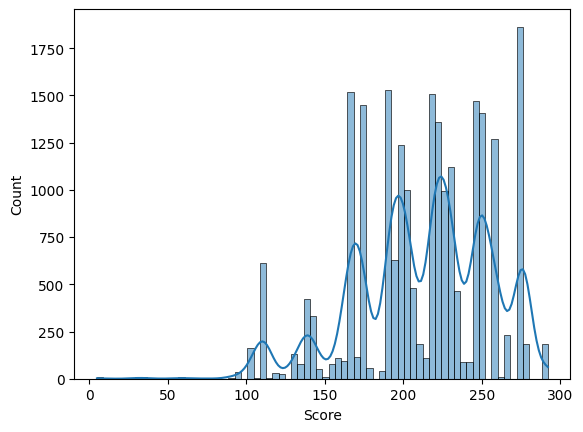

In [1106]:
# Distribution plot of predicted score
sns.histplot(x = train_points['Score'],
             kde = True)

Predict Score on Test Set


In [1107]:
# Transform the raw values in X_train into points
test_points = transform_points(raw_data = raw_test,
                               points_map_dict = points_map_dict,
                               num_cols = num_columns)

test_points.head()

,person_age,person_income,person_home_ownership,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28004,25,40,41,-27,25.0,11,25,25
15942,25,14,13,54,24.0,11,25,25
26343,25,40,56,28,25.0,42,25,25
16374,25,40,41,28,25.0,42,25,25
27301,25,40,41,54,24.0,42,25,25


In [1108]:
# Calculate the total score
test_points['Score'] = test_points.sum(axis=1).astype(int)

test_points[['person_age', 'Score']].head()

,person_age,Score
28004,25,165
15942,25,191
26343,25,266
16374,25,251
27301,25,276


<Axes: xlabel='Score', ylabel='Count'>

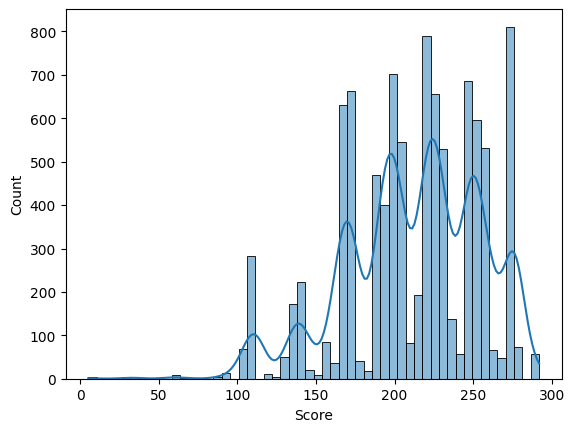

In [1109]:
# Distribution plot of predicted score
sns.histplot(x = test_points['Score'],
             kde = True)

5.3 Setting Cutoff


In [1110]:
cutoff_list = []
approval_rate_list = []

for cutoff in range (int(min_score), int(max_score)):

  cutoff_list.append(cutoff)

  approve_counts = len(train_points[train_points['Score'] >= cutoff])
  n_sample = len(train_points)

  approval_rate = approve_counts/n_sample

  approval_rate_list.append(approval_rate)

approval_rate_table = pd.DataFrame({'Cutoff' : cutoff_list,
                                    'Expected Approval Rate' : approval_rate_list})

approval_rate_table

,Cutoff,Expected Approval Rate
0,1,1.000000
1,2,1.000000
2,3,1.000000
3,4,1.000000
4,5,1.000000
...,...,...
286,287,0.008068
287,288,0.008068
288,289,0.008068
289,290,0.008068


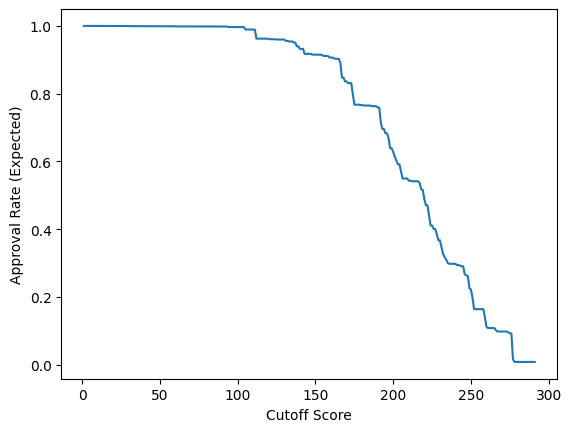

In [1111]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

plt.xlabel('Cutoff Score')
plt.ylabel('Approval Rate (Expected)')
plt.show()

In [1112]:
cutoff_list = []
bad_rate_list = []

for cutoff in range (int(min_score), int(max_score)):

  cutoff_list.append(cutoff)

  bad_counts = len(train_points[train_points['Score'] < cutoff])
  n_sample = len(train_points)

  bad_rate = bad_counts/n_sample

  bad_rate_list.append(bad_rate)

bad_rate_table = pd.DataFrame({'Cutoff' : cutoff_list,
                               'Expected Bad Rate' : bad_rate_list})

bad_rate_table

,Cutoff,Expected Bad Rate
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
...,...,...
286,287,0.991932
287,288,0.991932
288,289,0.991932
289,290,0.991932


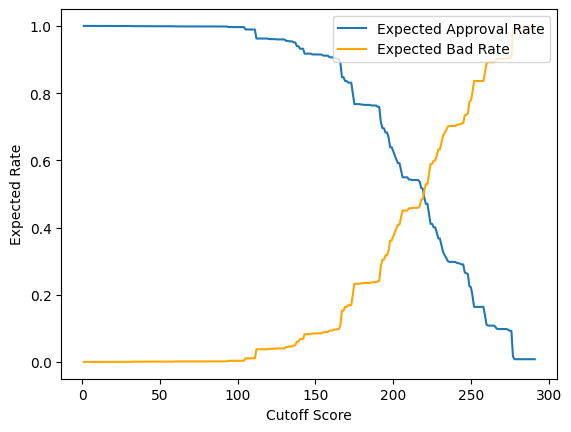

In [1113]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

# Plot the expected bad rate
plt.plot(bad_rate_table['Cutoff'],
         bad_rate_table['Expected Bad Rate'],
         label = "Expected Bad Rate",
         color = 'orange')

plt.ylabel("Expected Rate")
plt.xlabel("Cutoff Score")
plt.legend(loc = 1)
plt.show()

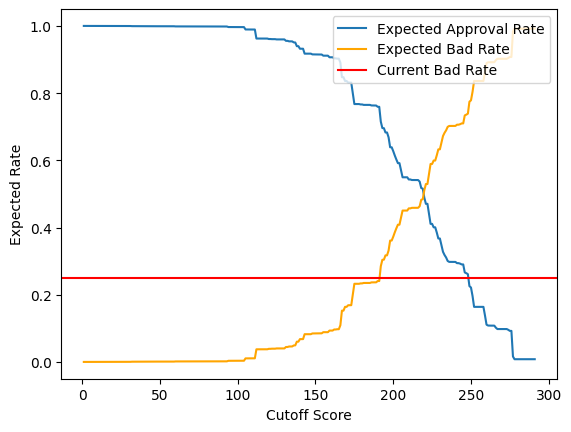

In [1114]:
# Add line for visualization
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

# Plot the expected bad rate
plt.plot(bad_rate_table['Cutoff'],
         bad_rate_table['Expected Bad Rate'],
         label = "Expected Bad Rate",
         color = 'orange')

plt.axhline(y=0.25, color='r', linestyle='-', label = "Current Bad Rate")

plt.ylabel("Expected Rate")
plt.xlabel("Cutoff Score")
plt.legend(loc = 1)

plt.show()

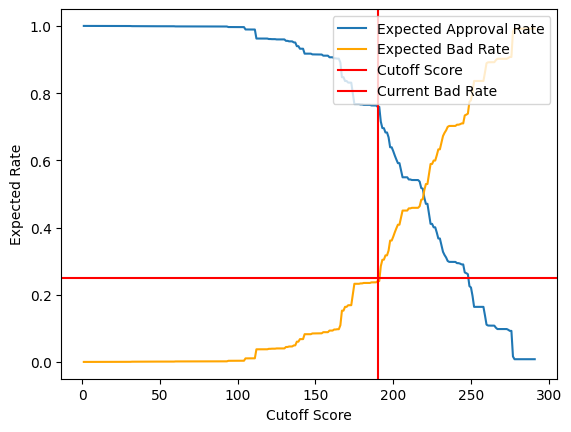

In [1115]:

# Add line for visualization
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

# Plot the expected bad rate
plt.plot(bad_rate_table['Cutoff'],
         bad_rate_table['Expected Bad Rate'],
         label = "Expected Bad Rate",
         color = 'orange')

plt.axvline(x=190, color='r', linestyle='-', label = "Cutoff Score")
plt.axhline(y=0.25, color='r', linestyle='-', label = "Current Bad Rate")


plt.ylabel("Expected Rate")
plt.xlabel("Cutoff Score")
plt.legend(loc = 1)

plt.show()

